In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [3]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
creditcard_df.drop(['CUST_ID'], axis=1, inplace=True)

In [5]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
mean_value = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df['CREDIT_LIMIT'].fillna(value=mean_value, inplace=True)

In [7]:
mean_value = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df['MINIMUM_PAYMENTS'].fillna(value=mean_value, inplace=True)

In [8]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# # Let's scale the data first
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# creditcard_df_scaled = scaler.fit_transform(creditcard_df)

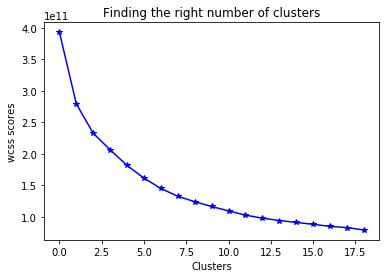

In [10]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df)
    wcss.append(kmeans.inertia_) 

plt.plot(wcss, 'b*-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('wcss scores') 
plt.show()

In [11]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
y_kmeans = kmeans.fit_predict(creditcard_df)

In [13]:
y_kmeans

array([1, 3, 5, ..., 1, 1, 1])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(creditcard_df)
x

array([[-4326.38395637,   921.5668839 ],
       [ 4118.91667599, -2432.8463473 ],
       [ 1497.90766006, -1997.57869196],
       ...,
       [-4379.44420243,   911.50456628],
       [-4791.11774446,  1032.54094369],
       [-3623.70274869,  1555.134769  ]])

In [19]:
# pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
# pca_df.head()

In [20]:
# # Concatenate the clusters labels to the dataframe
# pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
# pca_df.head()

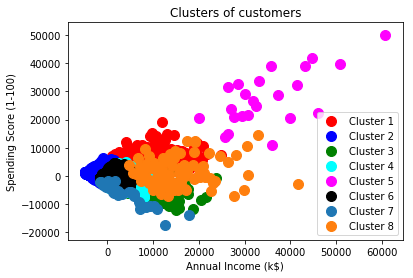

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(x[y_kmeans == 6, 0], x[y_kmeans == 6, 1], s = 100,  label = 'Cluster 7')
plt.scatter(x[y_kmeans == 7, 0], x[y_kmeans == 7, 1], s = 100,  label = 'Cluster 8')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()